In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
data_train = pd.read_csv('data/x_train.csv', sep=';', na_values='?')
data_test = pd.read_csv('data/x_test.csv', sep=';', na_values='?')
y_train = pd.read_csv('data/y_train.csv', sep=';', header=None, na_values='?')[0]

In [23]:
data_train.head()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
0,39,10,3,17,24.444444,1,5,0.400000,2650000,1375,21,2
1,21,22,19,55,17.045455,1,6,0.333333,5614000,3825,51,4
2,5,6,1,6,8.400000,0,1,1.000000,857000,1150,14,1
3,21,2,5,6,19.000000,0,1,0.000000,120000,0,1,1
4,4,5,1,5,9.600000,0,1,1.000000,857000,1075,12,1


In [24]:
if data_train.shape[0] == data_train.describe().loc['count'].min():
    print('Отсутствуют не заданные признаки')

Отсутствуют не заданные признаки


In [25]:
if data_test.shape[0] == data_test.describe().loc['count'].min():
    print('Отсутствуют не заданные признаки')

Отсутствуют не заданные признаки


In [26]:
categorical_columns = [c for c in data_train.columns if data_train[c].dtype.name == 'object']

if len(categorical_columns) == 0:
    print('Отсутствуют котегориальные признаки')

Отсутствуют котегориальные признаки


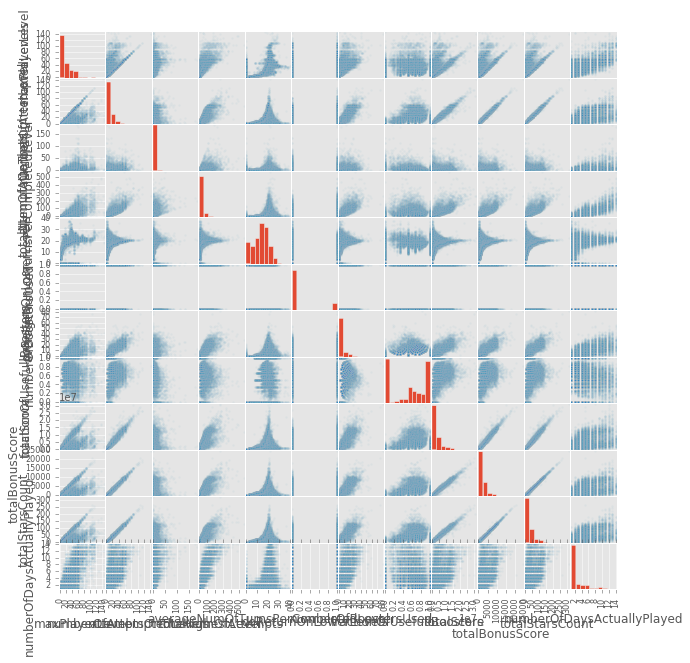

In [28]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data_train, alpha=0.05, figsize=(10, 10));

In [33]:
data.corr()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
maxPlayerLevel,1.000000,0.616157,0.472142,0.757854,0.683706,0.368297,0.675955,0.126235,0.570234,0.551366,0.579593,0.793385
numberOfAttemptedLevels,0.616157,1.000000,0.300797,0.836398,0.531197,0.290636,0.881915,0.332887,0.979954,0.989014,0.993779,0.663450
attemptsOnTheHighestLevel,0.472142,0.300797,1.000000,0.532032,0.277072,0.197035,0.389465,-0.041700,0.277326,0.264804,0.281343,0.524109
totalNumOfAttempts,0.757854,0.836398,0.532032,1.000000,0.509510,0.391969,0.836706,0.128843,0.798051,0.795570,0.808989,0.846448
averageNumOfTurnsPerCompletedLevel,0.683706,0.531197,0.277072,0.509510,1.000000,0.250261,0.543847,0.457168,0.499681,0.489411,0.514770,0.555594
doReturnOnLowerLevels,0.368297,0.290636,0.197035,0.391969,0.250261,1.000000,0.320439,0.071646,0.310218,0.271397,0.288803,0.383024
numberOfBoostersUsed,0.675955,0.881915,0.389465,0.836706,0.543847,0.320439,1.000000,0.203519,0.854263,0.851824,0.862254,0.751712
fractionOfUsefullBoosters,0.126235,0.332887,-0.041700,0.128843,0.457168,0.071646,0.203519,1.000000,0.328287,0.358474,0.358219,0.058929
totalScore,0.570234,0.979954,0.277326,0.798051,0.499681,0.310218,0.854263,0.328287,1.000000,0.985111,0.986423,0.617847
totalBonusScore,0.551366,0.989014,0.264804,0.795570,0.489411,0.271397,0.851824,0.358474,0.985111,1.000000,0.997357,0.606864


Есть сильно коррелирующие данные

Нормировка данных на основе обучающей и тостовой выборки

In [4]:
data_train = pd.read_csv('data/x_train.csv', sep=';', na_values='?')
data_test = pd.read_csv('data/x_test.csv', sep=';', na_values='?')

In [25]:
binary_columns = ["doReturnOnLowerLevels"]
numerical_columns = np.array(data_train.columns[np.array(data_train.columns) <> binary_columns[0]])

print binary_columns, numerical_columns

['doReturnOnLowerLevels'] ['maxPlayerLevel' 'numberOfAttemptedLevels' 'attemptsOnTheHighestLevel'
 'totalNumOfAttempts' 'averageNumOfTurnsPerCompletedLevel'
 'numberOfBoostersUsed' 'fractionOfUsefullBoosters' 'totalScore'
 'totalBonusScore' 'totalStarsCount' 'numberOfDaysActuallyPlayed']


In [32]:
full_data = pd.concat([data_train[numerical_columns], data_test[numerical_columns]]).reset_index(drop=True)

full_data_numerical = full_data[numerical_columns]

full_data_numerical = (full_data_numerical - full_data_numerical.mean()) / full_data_numerical.std()

middle = full_data_numerical.shape[0]/2
norm_train_numerical_data = full_data_numerical[:middle]
norm_test_numerical_data = full_data_numerical[middle:].reset_index(drop=True)

norm_train_data = pd.concat((norm_train_numerical_data, data_train[binary_columns]), axis=1)
norm_test_data = pd.concat((norm_test_numerical_data, data_test[binary_columns]), axis=1)

norm_train_data.to_csv('data/x_train_norm.csv', sep=';', header=True, index=False)
norm_test_data.to_csv('data/x_test_norm.csv', sep=';', header=True, index=False)

In [4]:
def drow_scatter(x, y, feature1, feature2, split=False):
    data_drow=pd.concat((x[feature1], x[feature2], y), axis=1)
    data_drow.columns=[feature1,feature2,'class']

    plt.figure(figsize=(10, 6))

    if split:
        plt.subplot(1, 2, 1)

    plt.scatter(data_drow[feature1][data_drow['class'] == 1],
                data_drow[feature2][data_drow['class'] == 1],
                alpha=0.75,
                color='red',
                label='1')

    if split:
        plt.subplot(1, 2, 2)
    plt.scatter(data_drow[feature1][data_drow['class'] == 0],
                data_drow[feature2][data_drow['class'] == 0],
                alpha=0.75,
                color='blue',
                label='0')

    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend(loc='best');

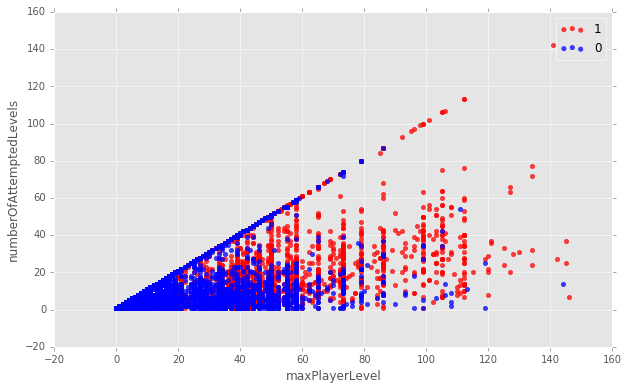

In [62]:
drow_scatter(data_train, y_train, 'maxPlayerLevel', 'numberOfAttemptedLevels')

In [29]:
'''
['doReturnOnLowerLevels'] ['maxPlayerLevel' 'numberOfAttemptedLevels' 'attemptsOnTheHighestLevel'
 'totalNumOfAttempts' 'averageNumOfTurnsPerCompletedLevel'
 'numberOfBoostersUsed' 'fractionOfUsefullBoosters' 'totalScore'
 'totalBonusScore' 'totalStarsCount' 'numberOfDaysActuallyPlayed']
 '''

"\n['doReturnOnLowerLevels'] ['maxPlayerLevel' 'numberOfAttemptedLevels' 'attemptsOnTheHighestLevel'\n 'totalNumOfAttempts' 'averageNumOfTurnsPerCompletedLevel'\n 'numberOfBoostersUsed' 'fractionOfUsefullBoosters' 'totalScore'\n 'totalBonusScore' 'totalStarsCount' 'numberOfDaysActuallyPlayed']\n "

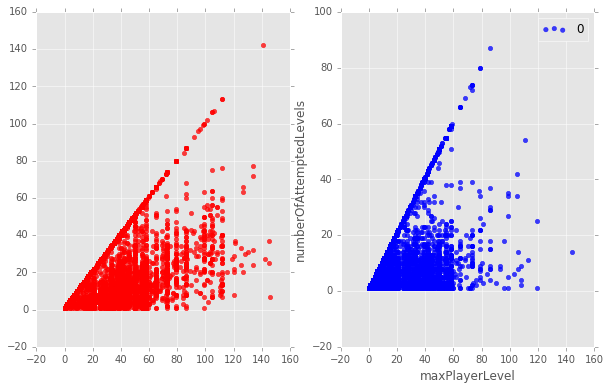

In [89]:
drow_scatter(data_train, y_train, 'maxPlayerLevel', 'numberOfAttemptedLevels', True)

In [16]:
unique, counts = np.unique(y_train, return_counts=True)

print np.asarray((unique, counts)).T

[[    0 18001]
 [    1  7288]]


выборка не сбалансированная

Всего используется 12 признаков, вычисленных за 2 предыдущие недели:

- maxPlayerLevel - максимальный уровень игры, который прошел игрок
- numberOfAttemptedLevels - количество уровней, которые попытался пройти игрок
- attemptsOnTheHighestLevel - число попыток, сделанных на самом высоком уровне
- totalNumOfAttempts - общее число попыток
- averageNumOfTurnsPerCompletedLevel - среднее количество ходов, выполненных на успешно пройденных уровнях
- doReturnOnLowerLevels - делал ли игрок возвраты к игре на уже пройденных уровнях
- numberOfBoostersUsed - количество использованных бустеров
- fractionOfUsefullBoosters - количество бустеров, использованных во время успешных попыток (игрок прошел уровнь)
- totalScore - общее количество набранных очков
- totalBonusScore - общее количество набранных бонусных очков
- totalStarsCount - общее количество набранных звезд
- numberOfDaysActuallyPlayed - количество дней, когда пользователь играл в игру


In [ ]:
data_train['y']=y_train

In [25]:
# Играет ли пользователь последовательно и попытался улучшить результат
data_train['isSequenceOverMaxLevel']=0
data_train.loc[data_train['maxPlayerLevel']-data_train['numberOfAttemptedLevels']<0, 'isSequenceOverMaxLevel']=1
# Играет ли пользователь последовательно и остановился на максимальном уровне
data_train['isSequenceStopMaxLevel']=0
data_train.loc[data_train['maxPlayerLevel']-data_train['numberOfAttemptedLevels']==0, 'isSequenceStopMaxLevel']=1

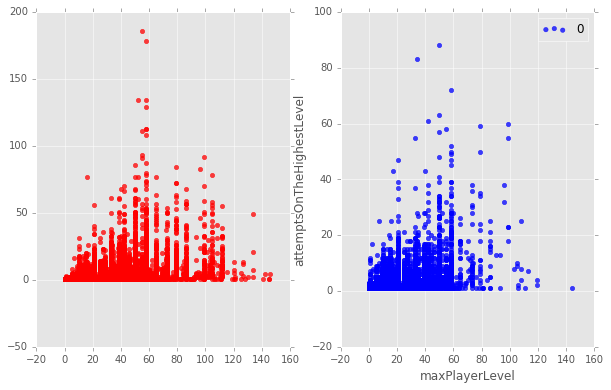

In [18]:
drow_scatter(data_train, y_train, 'maxPlayerLevel', 'attemptsOnTheHighestLevel', True)

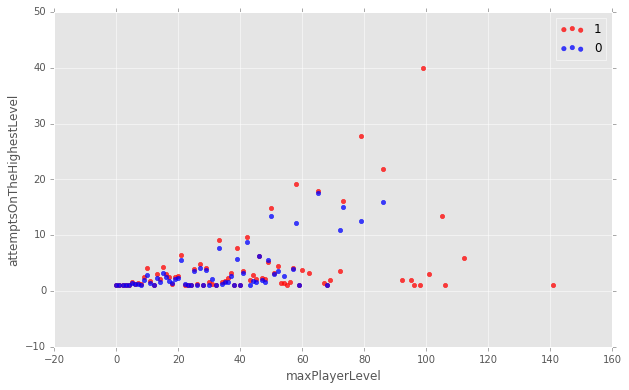

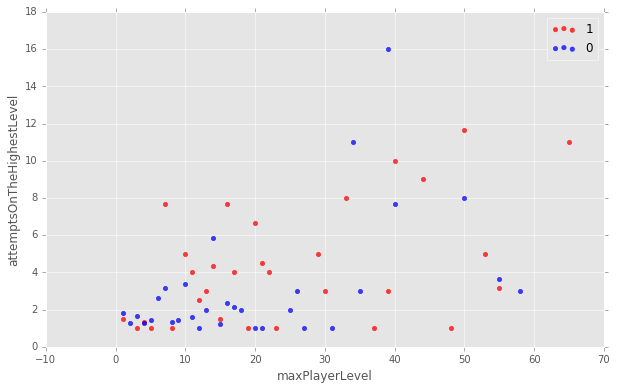

In [51]:
# среднее кол-во попыток на максимальном уровне (isSequenceStopMaxLevel или isSequenceOverMaxLevel+1)
# не знаю какой выделить признак
df = data_train[data_train['isSequenceOverMaxLevel']==1][['y','maxPlayerLevel','attemptsOnTheHighestLevel']].groupby(['y','maxPlayerLevel'], as_index=False).mean()
drow_scatter(df, df['y'], 'maxPlayerLevel','attemptsOnTheHighestLevel')

df = data_train[data_train['isSequenceStopMaxLevel']==1][['y','maxPlayerLevel','attemptsOnTheHighestLevel']].groupby(['y','maxPlayerLevel'], as_index=False).mean()
drow_scatter(df, df['y'], 'maxPlayerLevel','attemptsOnTheHighestLevel')

# Можно попробовать выделить TheHighestLevel. но он определится не для всех. и будет отличаться от MaxLevel на 1 или вообще не отличаться

In [71]:
for df in [data_train, data_test]:
    
    # Играет ли пользователь последовательно и попытался улучшить результат
    df['isSequenceOverMaxLevel']=0
    df.loc[df['maxPlayerLevel']-df['numberOfAttemptedLevels']<0, 'isSequenceOverMaxLevel']=1
    # Играет ли пользователь последовательно и остановился на максимальном уровне
    df['isSequenceStopMaxLevel']=0
    df.loc[data_train['maxPlayerLevel']-df['numberOfAttemptedLevels']==0, 'isSequenceStopMaxLevel']=1
    
    # Cредние за уровень
    df['totalNumOfAttemptsPerNumberOfAttemptedLevels'] = df['totalNumOfAttempts']/df['numberOfAttemptedLevels']
    df['totalScorePerNumberOfAttemptedLevels']         = df['totalScore']        /df['numberOfAttemptedLevels']

    # Cредние за день
    df['totalNumOfAttemptsPernumberOfDaysActuallyPlayed']       = df['totalNumOfAttempts']     /df['numberOfDaysActuallyPlayed']
    df['numberOfAttemptedLevelsPerNumberOfDaysActuallyPlayeds'] = df['numberOfAttemptedLevels']/df['numberOfDaysActuallyPlayed']
    df['totalScorePerNumberOfDaysActuallyPlayeds']              = df['totalScore']             /df['numberOfDaysActuallyPlayed']

In [72]:
binary_columns = ["doReturnOnLowerLevels", 'isSequenceOverMaxLevel', 'isSequenceStopMaxLevel']
numerical_columns = np.array(data_train.columns[np.array(data_train.columns) <> binary_columns[0]])

print binary_columns, numerical_columns

['doReturnOnLowerLevels', 'isSequenceOverMaxLevel', 'isSequenceStopMaxLevel'] ['maxPlayerLevel' 'numberOfAttemptedLevels' 'attemptsOnTheHighestLevel'
 'totalNumOfAttempts' 'averageNumOfTurnsPerCompletedLevel'
 'numberOfBoostersUsed' 'fractionOfUsefullBoosters' 'totalScore'
 'totalBonusScore' 'totalStarsCount' 'numberOfDaysActuallyPlayed'
 'isSequenceOverMaxLevel' 'isSequenceStopMaxLevel'
 'totalNumOfAttemptsPerNumberOfAttemptedLevels'
 'totalScorePerNumberOfAttemptedLevels'
 'totalNumOfAttemptsPernumberOfDaysActuallyPlayed'
 'numberOfAttemptedLevelsPerNumberOfDaysActuallyPlayeds'
 'totalScorePerNumberOfDaysActuallyPlayeds']


In [73]:
full_data = pd.concat([data_train[numerical_columns], data_test[numerical_columns]]).reset_index(drop=True)

full_data_numerical = full_data[numerical_columns]
full_data_numerical = (full_data_numerical - full_data_numerical.mean()) / full_data_numerical.std()

middle = full_data_numerical.shape[0]/2

norm_train_numerical_data = full_data_numerical[:middle]
norm_test_numerical_data = full_data_numerical[middle:].reset_index(drop=True)

norm_train_data = pd.concat((norm_train_numerical_data, data_train[binary_columns]), axis=1)
norm_test_data = pd.concat((norm_test_numerical_data, data_test[binary_columns]), axis=1)

norm_train_data.to_csv('data/x_train_norm_extended.csv', sep=';', header=True, index=False)
norm_test_data.to_csv('data/x_test_norm_extended.csv', sep=';', header=True, index=False)

In [85]:
data_train['y']=y_train
df=data_train[data_train['isSequenceOverMaxLevel'] + data_train['isSequenceStopMaxLevel']==1]
df[df['maxPlayerLevel']>86]

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed,isSequenceOverMaxLevel,isSequenceStopMaxLevel,totalNumOfAttemptsPerNumberOfAttemptedLevels,totalScorePerNumberOfAttemptedLevels,totalNumOfAttemptsPernumberOfDaysActuallyPlayed,numberOfAttemptedLevelsPerNumberOfDaysActuallyPlayeds,totalScorePerNumberOfDaysActuallyPlayeds,y
985,105,106,26,342,20.383929,1,35,0.714286,28775000,18350,244,12,1,0,3.226415,271462.264151,28.500000,8.833333,2.397917e+06,1
1250,99,100,59,335,20.666667,0,38,0.578947,27208000,17725,236,12,1,0,3.350000,272080.000000,27.916667,8.333333,2.267333e+06,1
1989,112,113,3,280,21.061404,1,43,0.720930,26656000,18025,242,13,1,0,2.477876,235893.805310,21.538462,8.692308,2.050462e+06,1
2005,98,99,1,281,20.430000,1,19,0.631579,26822000,17125,227,11,1,0,2.838384,270929.292929,25.545455,9.000000,2.438364e+06,1
2809,106,107,1,155,20.394495,1,76,0.894737,29802000,20425,267,5,1,0,1.448598,278523.364486,31.000000,21.400000,5.960400e+06,1
4274,95,96,2,279,20.770833,1,28,0.678571,23174000,16950,228,12,1,0,2.906250,241395.833333,23.250000,8.000000,1.931167e+06,1
5922,105,106,1,232,20.649123,1,59,0.677966,26788000,17125,226,10,1,0,2.188679,252716.981132,23.200000,10.600000,2.678800e+06,1
15137,101,102,3,260,20.650485,1,29,0.586207,25140000,17375,232,11,1,0,2.549020,246470.588235,23.636364,9.272727,2.285455e+06,1
16196,99,100,21,339,20.544554,1,42,0.642857,24540000,16650,224,13,1,0,3.390000,245400.000000,26.076923,7.692308,1.887692e+06,1
17439,112,113,9,374,21.192982,1,31,0.774194,26460000,19375,260,13,1,0,3.309735,234159.292035,28.769231,8.692308,2.035385e+06,1


In [88]:
df[df['maxPlayerLevel']<1].max()

maxPlayerLevel                                                0.0
numberOfAttemptedLevels                                       1.0
attemptsOnTheHighestLevel                                     3.0
totalNumOfAttempts                                            3.0
averageNumOfTurnsPerCompletedLevel                            7.0
doReturnOnLowerLevels                                         0.0
numberOfBoostersUsed                                          0.0
fractionOfUsefullBoosters                                     0.0
totalScore                                               238000.0
totalBonusScore                                             250.0
totalStarsCount                                               0.0
numberOfDaysActuallyPlayed                                    1.0
isSequenceOverMaxLevel                                        1.0
isSequenceStopMaxLevel                                        0.0
totalNumOfAttemptsPerNumberOfAttemptedLevels                  3.0
totalScore

In [23]:
data_train

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed,y
0,39,10,3,17,24.444444,1,5,0.400000,2650000,1375,21,2,0
1,21,22,19,55,17.045455,1,6,0.333333,5614000,3825,51,4,1
2,5,6,1,6,8.400000,0,1,1.000000,857000,1150,14,1,1
3,21,2,5,6,19.000000,0,1,0.000000,120000,0,1,1,1
4,4,5,1,5,9.600000,0,1,1.000000,857000,1075,12,1,0
5,0,1,1,1,3.000000,0,0,0.000000,113000,250,0,1,0
6,13,14,2,19,15.500000,0,5,0.800000,3831000,2875,34,2,1
7,13,14,5,26,14.769231,0,4,0.500000,3458000,2375,31,2,1
8,2,3,1,3,7.666667,0,0,0.000000,420000,750,6,1,0
9,1,2,3,5,3.000000,1,0,0.000000,113000,250,3,1,0


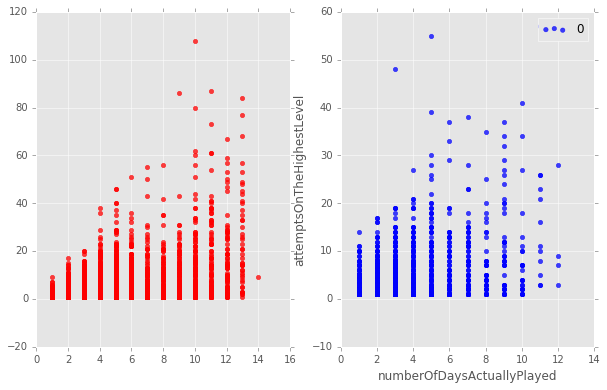

In [29]:
y = data_train[data_train['isSequenceOverMaxLevel']==1]['y']
drow_scatter(data_train[data_train['isSequenceOverMaxLevel']==1], y, 'numberOfDaysActuallyPlayed', 'attemptsOnTheHighestLevel', True)

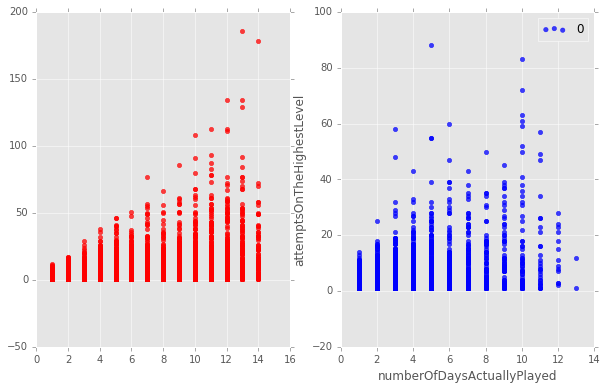

In [18]:
drow_scatter(data_train, y_train, 'numberOfDaysActuallyPlayed', 'attemptsOnTheHighestLevel', True)

In [14]:
data_train['y']=y_train
data_train[data_train['numberOfDaysActuallyPlayed']==14] # все 1
df=data_train[data_train['numberOfDaysActuallyPlayed']==13] # все 1
df.groupby('y').count()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
y,,,,,,,,,,,,
0,2,2,2,2,2,2,2,2,2,2,2,2
1,176,176,176,176,176,176,176,176,176,176,176,176


In [15]:
176./178

0.9887640449438202